# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


In [135]:
pip install --user emoji

  Using cached emoji-2.11.1-py2.py3-none-any.whl (433 kB)
Note: you may need to restart the kernel to use updated packages.


In [160]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [165]:
# add imports
import numpy as np
import matplotlib.pyplot as plt
import string

# show everything when showing head
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# need to manually download stopwords from nltk
import nltk
nltk.download('stopwords')

sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roger.qiu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
# check stop words
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [140]:
# location of the data
data_location = "USD/11. Applied Text Mining/ads-509/module_2/ads-tm-token-norm/M1 Results"

twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [141]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 

    # length of num tokens list
    num_tokens = len(tokens)

    # length of unique tokens in list
    num_unique_tokens = len(set(tokens))

    # unique tokens divided by total tokens to see diversity
    lexical_diversity = num_unique_tokens / num_tokens

    # get sum of characters
    sum = 0
    for word in tokens:
        for char in word:
            sum += 1

    num_characters = sum
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [142]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Using assert makes it easier for you to find any issues with your function or logic. For example, by adding the assert with [0] being 13, it makes sure that the answer produces 13 tokens from the data. Or else it will throw an error and inform you of what the error is.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [143]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/roger.qiu/Documents/other/code/USD/11. Applied Text Mining/ads-509/module_2/ads-tm-token-norm


In [144]:
# set subdirectory path
directory_path = "M1 Results/lyrics/cher/"

# create empty list to store filenames
filenames = []

# for every filename in the directory path, add it to filesnames
for filename in os.listdir(directory_path):
    filenames.append(filename)

filenames[:5]

['cher_comeandstaywithme.txt',
 'cher_pirate.txt',
 'cher_stars.txt',
 'cher_thesedays.txt',
 'cher_lovesohigh.txt']

In [145]:
# create list for full filepaths
file_paths = []

# for each filepath plus file name, append to filepaths
for filename in filenames:
    file_path = os.path.join(directory_path, filename)
    file_paths.append(file_path)

file_paths[:5]

['M1 Results/lyrics/cher/cher_comeandstaywithme.txt',
 'M1 Results/lyrics/cher/cher_pirate.txt',
 'M1 Results/lyrics/cher/cher_stars.txt',
 'M1 Results/lyrics/cher/cher_thesedays.txt',
 'M1 Results/lyrics/cher/cher_lovesohigh.txt']

In [146]:
# empty data list to store all the text data
data = []

# for each file path, open the text file, read it, strip trailing spaces and sppend to data as a list
for file_path in file_paths:    
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().strip()
        data.append([filename, text])

data[:1]

[['cher_classified1a.txt',
  '"Come And Stay With Me"\n\n\n\nI\'ll send away all my false pride\nAnd I\'ll forsake all of my life\nYes I\'ll be as true as true can be\nIf you\'ll come and stay with me\n\nAll lovers of the past, I\'ll leave behind\nThey\'ll never be another on my mind\nI\'ll do all I can so you\'ll feel free\nIf you\'ll come and stay with me\n\nThe promise I made most faithfully\nI\'ll keep still if you decide to leave\nI\'ll try and see that you have all you need\nIf you\'ll come and stay with me\n\nYes I\'ll be as true as true can be\nIf you\'ll come and stay with me\n\nLive a life no others have ever known\nBut I know you think that I\'m hardly grown\nOh thank God at last and finally\nI can see you\'re gonna stay with me\nI can see you\'re gonna stay with me']]

In [147]:
# create a dataframe based on the data lists
df_cher = pd.DataFrame(data, columns=['Filename', 'Text'])

df_cher.head()

,Filename,Text
0,cher_classified1a.txt,"""Come And Stay With Me""\n\n\n\nI'll send away all my false pride\nAnd I'll forsake all of my life\nYes I'll be as true as true can be\nIf you'll come and stay with me\n\nAll lovers of the past, I'll leave behind\nThey'll never be another on my mind\nI'll do all I can so you'll feel free\nIf you'll come and stay with me\n\nThe promise I made most faithfully\nI'll keep still if you decide to leave\nI'll try and see that you have all you need\nIf you'll come and stay with me\n\nYes I'll be as true as true can be\nIf you'll come and stay with me\n\nLive a life no others have ever known\nBut I know you think that I'm hardly grown\nOh thank God at last and finally\nI can see you're gonna stay with me\nI can see you're gonna stay with me"
1,cher_classified1a.txt,"""Pirate""\n\n\n\nHe'll sail on with the summer wind\nThat blows on this same day\nEverybody calls him Pirate\nDark and handsome in his own way\nAnd the fire in his eyes\nLit all the fire inside of me\nAnd soon you were feeling\nSo much more than the wind and waves and sea\n\nPirate I'm gonna take your soul\nI only want the right to love you\nI know the sea won't let you go\nPirate, my love will only chain you down\nSo just know how much I love you\nAnd then turn that ship around\n\nEvery time that he'd sail back to me\nWe'd fall in love again\nAnd my face would fill with wonder\nAt all the places that he's been\nBut I knew his sweetest love song\nWas when he heard the trade winds blow\nAnd I loved him way too much\nTo tell the secret he should know\n\nPirate I'm gonna take your soul\nI only want the right to love you\nI know the sea won't let you go\nPirate, my love will only chain you down\nSo just know how much I love you\nAnd then turn that ship around\n\nNow as I watch in silence\nAnother young man goes to sea\nAnd his silhouette is stirrin' up\nA painful memory\nAnd I know his heart is set to sail\nBut mine is set to cry\nCause I feel as the way I did\nThe day is Daddy said goodbye\nI told him\n\nPirate I'm gonna take your soul\nI only want the right to love you\nI know the sea won't let you go\nPirate, my love will only chain you down\nSo just know how much I love you\nAnd then turn that ship around"
2,cher_classified1a.txt,"""Stars""\n\n\n\nI was never one for saying what I really feel\nExcept tonight I'm bringing everything I know that's real\n\nStars they come and go\nThey come fast\nThey come slow\nThey go like the last light of the sun\nAll in a blaze\nAnd all you see is glory\nHey, but it gets lonely here\nWhen there's no one here to share\nYou can shake it all away if you will hear my story\nSome people ask for fame like athlete's in a game\nWe break our collarbones and come up swinging\nSome of us are downed some of us a crowned\nAnd some are lost and never found but most have seen it all\nThey live there lives in sad cafe's and music halls\nThey always come up singing\nSome make it when they're young before the world has done its dirty job\nLater on someone will say you've had your day,\nAnd now you must make way\nBut they will never know the pain of living\nWith a name you'd never own\nOr the many years forgetting\nWhat you know too well\nThat the ones who get the crown\nHave been let down\nYet try to make amends\nWithout defending\nPerhaps pretending\nYou never saw the eyes\nOf grown men of twenty-five\nThat follow as you walk\nAnd ask for autographs\nOr kiss you on the cheek\nBut you never can believe\nThey really love you\nSome make it when they're old\nPerhaps they have a soul\nThey're not afraid to bear\nOr perhaps there's nothing there\n\nStars they come and go\nThey come fast\nThey come slow\nThey go like the last light of the sun\nAll in a blaze\nAnd all you see is glory\n\nBut most have seen it all\nThey live there lives\nIn sad cafe's and music halls\nThey always come up singing\nSinging\nSinging\nSinging"
3,cher_classified1a.txt,"""These Days""\n\n\n\nWell I've been out walking \nAnd I don't do that much t

In [148]:
# check the shape
df_cher.shape

(316, 2)

In [149]:
# now do the same for robyn

directory_path = "M1 Results/lyrics/robyn/"

filenames = []

for filename in os.listdir(directory_path):
    filenames.append(filename)

file_paths = []

for filename in filenames:
    file_path = os.path.join(directory_path, filename)
    file_paths.append(file_path)

data = []

for file_path in file_paths:    
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().strip()
        data.append([filename, text])

df_robyn = pd.DataFrame(data, columns=['Filename', 'Text'])
df_robyn.head()

,Filename,Text
0,robyn_play.txt,"""Include Me Out""\n\n\n\nIt is really very simple\nJust a single pulse, repeated at a regular interval\n\nMmm, hmm\nDon't include me out, no\nDon't include me out\n\nOne time for the records and the hits\nTwo for your money-maker, shake, boom\nThree times for the lucky and the dead\n\nOne time for the sorry and safe\nTwo for the beggar and his company\nThree times for the sinner and the saint\n\nYeah, bow down all you wicked and the vain\nBow to the miracle, the em, na, na\nThree times and the devil will be gone\n\nOne time for the fire, bring it on\nTwo for the boogie, gotta bang the beat\nThree times for the ladies, show me some love\n\nTalking 'bout everyone, every day, all day\n\nAnd if your world should fall apart\nThere's plenty room inside my heart\nJust don't include me out\nDon't include me out\n\nAnd if your world should fall apart\nI still got room inside my heart\nJust don't include me out\nDon't include me out, d-d-don't include me out\n\nAll hail to the mamas who hold it down\nHail to the pillar of the family\nThis one's for the granny, take a bow\n\nOne time for the crazy and the bent\nCome on, all you trannies click your heels for me\nAll praise the fugeses and the gems\n\nTalking 'bout everyone, every day, all day, oh yeah\n\nAnd if your world should fall apart\nThere's plenty room inside my heart\nJust don't include me out\nJust don't include me out\n\nAnd if your world should fall apart\nI still got room inside my heart\nJust don't include me out\nDon't include me out, d-d-don't include me out\n\nCan I get a beat, beat for all of my watchamacallits\nDoing whatever and with whoever they like?\nCan I get a beat, beat for all of my watchamacallits\nDoing whatever and with whoever they like?\n\nCan I get a bam, bam for all of my watchamacallits\nDoing whatever and with whoever they like?\nCan I get a bam, bam for all of my watchamacallits\nDoing whatever and with whoever they like?\n\nI'm talking about everyone, every day, all day, hey\n\nAnd if your world should fall apart\nThere's plenty room inside my heart\nJust don't include me out\nDon't include me out\n\nAnd if your world should fall apart\nI still got room inside my heart\nJust don't include me out\nDon't include me out\n\nAnd if your world should fall apart\nThere's plenty room inside my heart\nJust don't include me out, hey, hey\n\nAnd if your world should fall apart\nI still got room inside my heart, yeah\nJust don't include me out, hey"
1,robyn_play.txt,"""Electric""\n\n\n\nElectric...\n\nIt's electric\nIt's a natural high\nElectric\nWe don't always know why\nElectric\nKeep your ego aside\nWell it's electric\nIt's a thing you can't deny\n\nBlood boils without fire\nDay come, day go\nWithout your desire\nDisturbs the flow\nWhen in denial\nNight falls,\nFalls to take you higher\n\nIt's electric\nIt's a natural high\nElectric\nWe don't always know why\nElectric\nKeep your ego aside\nWell it's electric\nIt's the thing you can't deny\n\nA hard question\nNeeds an easy answer\nRecognize, accept no need to censor\nThe harder the fall\nThe higher the bounce\nSmooth moves\nKeeps your buoyancy\nYeah, keeps your balance\nOhh ah\n\nIt's electric\nIt's a natural high\nElectric\nWe don't always know why\nElectric\nKeep your ego aside\nWell it's electric\nIt's the thing you can't deny\n\nOhh\nElectric\nElectric (can't deny that it's so)\nElectric (it's electric)\nElectric (oooh yeah yeah yeah)\n\nIn the eyes of a child\nAnd the love that moves\nThe sun and the stars above\nThat race your heart\nSomebody dies\nAnd you have to cry\nWhen you think this is it\nAnd then some other\nShit just happens\nYeah, it just happens, happens\nThat's when\n\nIt's electric\nIt's a natural high\nElectric\nWe don't always know why\nElectric\nKeep your ego aside\nWell it's electric\nIt's the thing you can't deny\n\nIt's electric\nIt's a natural high\nElectric\nWe don't always know why\nElectric\nKeep your ego aside\nWell it's electric\nIt's the thing yo

In [150]:
df_robyn.shape

(104, 2)

In [209]:
# union the two df's together so we have one complete df for both artists
df_lyrics = pd.concat([df_cher, df_robyn], ignore_index=True)
df_lyrics.shape

(420, 2)

In [152]:
# Read in the twitter data

# set path, same process as earlier with lyrics data
directory_path = "M1 Results/twitter"

filenames = []

for filename in os.listdir(directory_path):
    filenames.append(filename)

filenames

['.DS_Store',
 'cher_followers_data.txt',
 'robynkonichiwa_followers_data.txt',
 'cher_followers.txt',
 'robynkonichiwa_followers.txt']

In [153]:
# remove extraneous file
filenames.remove('.DS_Store')

#### This part crashes whenever I try to run it so it will not work

#### So instead, I will just take text from a single file as an example

In [154]:
twitter_text = """
    hsmcnp	Country Girl	35152213		1302	1014	
    horrormomy	Jeny	742153090850164742	Earth	81	514	𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
    anju79990584	anju	1496463006451974150		13	140	163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
    gallionjenna	J	3366479914		752	556	csu
    bcscomm	bcscomm	83915043	Washington, DC	888	2891	Writer @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com
    liaochaoqun2	廖超群	1502787622376075264	Taiwan	2	390	
    Rodhandyjj	Art Vandalay 🇺🇦🇺🇦🇺🇦	1386454132022824962	Maine, USA	104	159	I’m unemployed and live with my parents. MOOPS!
    JackBianchi7	Jackson	1200870825953550336		0	7	zoowee mama
    MelbaBu81266475	Melba Burns	1492913469166743554		17	136	
    macryant900	SpyderRyder	3425156986	🇨🇦	628	794	Let the healing begin. Let us learn from the past. 🇨🇦 follower of #TheResistance
    notdevilanse	Amanda 😇	916870029123211264		13	110	do what thou wilt. 🖤✨
    dickgirIdiaries	dickgirldiaries	1098760805162471424		480	212	
    bloomingrx	Roxana M 🇺🇦🇨🇦	1489642891437817859	Delisle, Saskatchewan	16	163	Curious Canadian Contemplator. She/Her. Sexagenarian. We are here for each other!
    nurb43211	nurb4321	1502808896292937730		0	110	
    ERParker3	edieparker	16700926		7	236	
    m4ggots4br4ins	emma	1112046229985218560	California, USA	40	52	
    eyoTTracy	Tracy Nicole	1449604704049065984		18	368	
    Taliaasaurus	Σκουπίδια	332397786		134	314	(She/Her/Hers) Feminist. LGBTQ+. BLM. Mental health advocate. Do something nice for somebody today :)
"""

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



#### cleaning lyrics data

In [211]:
df_lyrics[:1]

,Filename,Text
0,cher_classified1a.txt,"""Come And Stay With Me""\n\n\n\nI'll send away all my false pride\nAnd I'll forsake all of my life\nYes I'll be as true as true can be\nIf you'll come and stay with me\n\nAll lovers of the past, I'll leave behind\nThey'll never be another on my mind\nI'll do all I can so you'll feel free\nIf you'll come and stay with me\n\nThe promise I made most faithfully\nI'll keep still if you decide to leave\nI'll try and see that you have all you need\nIf you'll come and stay with me\n\nYes I'll be as true as true can be\nIf you'll come and stay with me\n\nLive a life no others have ever known\nBut I know you think that I'm hardly grown\nOh thank God at last and finally\nI can see you're gonna stay with me\nI can see you're gonna stay with me"


In [212]:
# replace all the \n with a space and then concatenating them into one single line
df_lyrics['Text'] = df_lyrics['Text'].str.replace(r'\n+', ' ', regex=True).str.strip()
df_lyrics[:1]

,Filename,Text
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me"


In [180]:
punctuation = set(punctuation) # speeds up comparison
punctuation

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [163]:
# convert the set into a single string
punctuation_pattern = '[' + ''.join(punctuation) + ']'
punctuation_pattern

'[.%]<\\-!"&{\'/}~;_$,:=[>?|#*^)+(`@]'

In [213]:
# remove all punctuation from the text field
df_lyrics['Text'] = df_lyrics['Text'].str.replace(punctuation_pattern, '', regex=True)
df_lyrics[:1]

,Filename,Text
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me"


In [214]:
# split texts on whitespace to create tokens
df_lyrics['Tokens'] = df_lyrics['Text'].str.split()
df_lyrics[:1]

,Filename,Text,Tokens
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me","[""Come, And, Stay, With, Me"", I'll, send, away, all, my, false, pride, And, I'll, forsake, all, of, my, life, Yes, I'll, be, as, true, as, true, can, be, If, you'll, come, and, stay, with, me, All, lovers, of, the, past,, I'll, leave, behind, They'll, never, be, another, on, my, mind, I'll, do, all, I, can, so, you'll, feel, free, If, you'll, come, and, stay, with, me, The, promise, I, made, most, faithfully, I'll, keep, still, if, you, decide, to, leave, I'll, try, and, see, that, you, have, all, you, need, If, you'll, come, and, stay, with, me, Yes, I'll, be, ...]"


In [215]:
# convert all the tokens to lowercase
# apply .lower() for each token in the tokens list
df_lyrics['Tokens'] = df_lyrics['Tokens'].apply(lambda tokens: [token.lower() for token in tokens])
df_lyrics[:1]

,Filename,Text,Tokens
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me","[""come, and, stay, with, me"", i'll, send, away, all, my, false, pride, and, i'll, forsake, all, of, my, life, yes, i'll, be, as, true, as, true, can, be, if, you'll, come, and, stay, with, me, all, lovers, of, the, past,, i'll, leave, behind, they'll, never, be, another, on, my, mind, i'll, do, all, i, can, so, you'll, feel, free, if, you'll, come, and, stay, with, me, the, promise, i, made, most, faithfully, i'll, keep, still, if, you, decide, to, leave, i'll, try, and, see, that, you, have, all, you, need, if, you'll, come, and, stay, with, me, yes, i'll, be, ...]"


In [174]:
# check stopwords
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [216]:
# remove stop words from tokens
# cleaned tokens will be all the token in tokens as long as they are not in stopwords list
df_lyrics['Cleaned_Tokens'] = df_lyrics['Tokens'].apply(lambda tokens: [token for token in tokens if token not in sw])
df_lyrics[:1]

,Filename,Text,Tokens,Cleaned_Tokens
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me","[""come, and, stay, with, me"", i'll, send, away, all, my, false, pride, and, i'll, forsake, all, of, my, life, yes, i'll, be, as, true, as, true, can, be, if, you'll, come, and, stay, with, me, all, lovers, of, the, past,, i'll, leave, behind, they'll, never, be, another, on, my, mind, i'll, do, all, i, can, so, you'll, feel, free, if, you'll, come, and, stay, with, me, the, promise, i, made, most, faithfully, i'll, keep, still, if, you, decide, to, leave, i'll, try, and, see, that, you, have, all, you, need, if, you'll, come, and, stay, with, me, yes, i'll, be, ...]","[""come, stay, me"", i'll, send, away, false, pride, i'll, forsake, life, yes, i'll, true, true, come, stay, lovers, past,, i'll, leave, behind, they'll, never, another, mind, i'll, feel, free, come, stay, promise, made, faithfully, i'll, keep, still, decide, leave, i'll, try, see, need, come, stay, yes, i'll, true, true, come, stay, live, life, others, ever, known, know, think, i'm, hardly, grown, oh, thank, god, last, finally, see, gonna, stay, see, gonna, stay]"


#### cleaning twitter data

In [176]:
twitter_text

'\n    hsmcnp\tCountry Girl\t35152213\t\t1302\t1014\t\n    horrormomy\tJeny\t742153090850164742\tEarth\t81\t514\t𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜\n    anju79990584\tanju\t1496463006451974150\t\t13\t140\t163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡\n    gallionjenna\tJ\t3366479914\t\t752\t556\tcsu\n    bcscomm\tbcscomm\t83915043\tWashington, DC\t888\t2891\tWriter @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com\n    liaochaoqun2\t廖超群\t1502787622376075264\tTaiwan\t2\t390\t\n    Rodhandyjj\tArt Vandalay 🇺🇦🇺🇦🇺🇦\t1386454132022824962\tMaine, USA\t104\t159\tI’m unemployed and live with my parents. MOOPS!\n    JackBianchi7\tJackson\t1200870825953550336\t\t0\t7\tzoowee mama\n    MelbaBu81266475\tMelba Burns\t1492913469166743554\t\t17\t136\t\n    macryant900\tSpyderRyder\t3425156986\t🇨🇦\t628\t794\tLet the healing begin. Let us learn from the past. 🇨🇦 follower of #TheResistance\n    notdevilanse\t

In [177]:
# replace newline characters with a single space
twitter_text = re.sub(r'\s+', ' ', twitter_text).strip()
twitter_text

'hsmcnp Country Girl 35152213 1302 1014 horrormomy Jeny 742153090850164742 Earth 81 514 𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜 anju79990584 anju 1496463006451974150 13 140 163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡 gallionjenna J 3366479914 752 556 csu bcscomm bcscomm 83915043 Washington, DC 888 2891 Writer @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com liaochaoqun2 廖超群 1502787622376075264 Taiwan 2 390 Rodhandyjj Art Vandalay 🇺🇦🇺🇦🇺🇦 1386454132022824962 Maine, USA 104 159 I’m unemployed and live with my parents. MOOPS! JackBianchi7 Jackson 1200870825953550336 0 7 zoowee mama MelbaBu81266475 Melba Burns 1492913469166743554 17 136 macryant900 SpyderRyder 3425156986 🇨🇦 628 794 Let the healing begin. Let us learn from the past. 🇨🇦 follower of #TheResistance notdevilanse Amanda 😇 916870029123211264 13 110 do what thou wilt. 🖤✨ dickgirIdiaries dickgirldiaries 1098760805162471424 480 212 blooming

In [183]:
# use translate to remove all puncatuation from text
twitter_text = twitter_text.translate(str.maketrans('', '', punctuation_pattern))

twitter_text

'hsmcnp Country Girl 35152213 1302 1014 horrormomy Jeny 742153090850164742 Earth 81 514 𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜  𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜 anju79990584 anju 1496463006451974150 13 140 163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡 gallionjenna J 3366479914 752 556 csu bcscomm bcscomm 83915043 Washington DC 888 2891 Writer Washinformer SpelmanCollege alumna DCnative Awardwinning journalist  PR pro IABC Fellow  Past Chair IG bcscomm Email wibsilergmailcom liaochaoqun2 廖超群 1502787622376075264 Taiwan 2 390 Rodhandyjj Art Vandalay 🇺🇦🇺🇦🇺🇦 1386454132022824962 Maine USA 104 159 I’m unemployed and live with my parents MOOPS JackBianchi7 Jackson 1200870825953550336 0 7 zoowee mama MelbaBu81266475 Melba Burns 1492913469166743554 17 136 macryant900 SpyderRyder 3425156986 🇨🇦 628 794 Let the healing begin Let us learn from the past 🇨🇦 follower of TheResistance notdevilanse Amanda 😇 916870029123211264 13 110 do what thou wilt 🖤✨ dickgirIdiaries dickgirldiaries 1098760805162471424 480 212 bloomingrx Roxana M 🇺🇦🇨🇦 148

In [184]:
# split to create tokens
twitter_tokens = twitter_text.split()

print(twitter_tokens[:5])
print(len(twitter_tokens))

['hsmcnp', 'Country', 'Girl', '35152213', '1302']
189


In [185]:
# lowercase all the tokens
twitter_tokens_lower = [token.lower() for token in twitter_tokens]

print(twitter_tokens_lower[:5])
print(len(twitter_tokens_lower))

['hsmcnp', 'country', 'girl', '35152213', '1302']
189


In [186]:
# filter out stopwords from the tokens
twitter_tokens_filtered = [token for token in twitter_tokens_lower if token not in sw]

print(twitter_tokens_filtered[:5])
print(len(twitter_tokens_filtered))

['hsmcnp', 'country', 'girl', '35152213', '1302']
171


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [217]:
# apply the the descriptive_stats function to the cleaned tokens of each records in df_lyrics to create 4 new fields
df_lyrics[['num_tokens', 'num_unique_tokens', 'lexical_diversity', 'num_characters']] = df_lyrics['Cleaned_Tokens'].apply(lambda tokens: pd.Series(descriptive_stats(tokens, verbose=False)))
df_lyrics[:1]

,Filename,Text,Tokens,Cleaned_Tokens,num_tokens,num_unique_tokens,lexical_diversity,num_characters
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me","[""come, and, stay, with, me"", i'll, send, away, all, my, false, pride, and, i'll, forsake, all, of, my, life, yes, i'll, be, as, true, as, true, can, be, if, you'll, come, and, stay, with, me, all, lovers, of, the, past,, i'll, leave, behind, they'll, never, be, another, on, my, mind, i'll, do, all, i, can, so, you'll, feel, free, if, you'll, come, and, stay, with, me, the, promise, i, made, most, faithfully, i'll, keep, still, if, you, decide, to, leave, i'll, try, and, see, that, you, have, all, you, need, if, you'll, come, and, stay, with, me, yes, i'll, be, ...]","[""come, stay, me"", i'll, send, away, false, pride, i'll, forsake, life, yes, i'll, true, true, come, stay, lovers, past,, i'll, leave, behind, they'll, never, another, mind, i'll, feel, free, come, stay, promise, made, faithfully, i'll, keep, still, decide, leave, i'll, try, see, need, come, stay, yes, i'll, true, true, come, stay, live, life, others, ever, known, know, think, i'm, hardly, grown, oh, thank, god, last, finally, see, gonna, stay, see, gonna, stay]",72.0,47.0,0.652778,322.0


In [189]:
# apply descriptive stats to the twitter text
descriptive_stats(twitter_tokens_filtered)

There are 171 tokens in the data.
There are 161 unique tokens in the data.
There are 1198 characters in the data.
The lexical diversity is 0.942 in the data.


[171, 161, 0.9415204678362573, 1198]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Yes, I think if we we're to include stopwords, the top 5 words would probably be "you", "I" and other common tokens that don't provide usefull information.

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

In [222]:
# create artists field based on if filename starts with cher or robyn
df_lyrics['Artist'] = df_lyrics['Filename'].apply(lambda x: 'cher' if x.startswith('cher_') else ('robyn'))

# groupy by artists and then get the mean of diversity to see average diversity by artists
average_lexical_diversity = df_lyrics.groupby('Artist')['lexical_diversity'].mean().reset_index()
print(average_lexical_diversity)

  Artist  lexical_diversity
0   cher           0.558544
1  robyn           0.510981


A: Based on the analysis, it seems that cher has a higher lexical diversity than robyn. Since I do not know either artists, I do not have any prior beliefs for either artists.


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [196]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

In [197]:
emoji

<module 'emoji' from '/Users/roger.qiu/.local/lib/python3.9/site-packages/emoji/__init__.py'>

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [198]:
# get all emojis from the twitter text if the char is an emoji
emojis = [char for token in twitter_tokens_filtered for char in token if emoji.is_emoji(char)]
emojis

['💜', '🍒', '💓', '🧡', '😇', '🖤', '✨']

In [199]:
# get count of each emoji
emoji_counts = Counter(emojis)
emoji_counts

Counter({'💜': 1, '🍒': 1, '💓': 1, '🧡': 1, '😇': 1, '🖤': 1, '✨': 1})

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [200]:
# filter strings that start with '#'
hashtags = [token for token in twitter_tokens_filtered if token.startswith('#')]
hashtags

[]

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [223]:
# create function to get title words from tokens
# title words all have a " 
def extract_title_words(tokens):
    return [token.replace('"', '') for token in tokens if '"' in token]

# apply function to cleaned tokens as title words, this function to the cleaned_tokens to get title words
df_lyrics['Title_Words'] = df_lyrics['Cleaned_Tokens'].apply(extract_title_words)
df_lyrics[:1]

,Filename,Text,Tokens,Cleaned_Tokens,num_tokens,num_unique_tokens,lexical_diversity,num_characters,Title_Words,Artist
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me","[""come, and, stay, with, me"", i'll, send, away, all, my, false, pride, and, i'll, forsake, all, of, my, life, yes, i'll, be, as, true, as, true, can, be, if, you'll, come, and, stay, with, me, all, lovers, of, the, past,, i'll, leave, behind, they'll, never, be, another, on, my, mind, i'll, do, all, i, can, so, you'll, feel, free, if, you'll, come, and, stay, with, me, the, promise, i, made, most, faithfully, i'll, keep, still, if, you, decide, to, leave, i'll, try, and, see, that, you, have, all, you, need, if, you'll, come, and, stay, with, me, yes, i'll, be, ...]","[""come, stay, me"", i'll, send, away, false, pride, i'll, forsake, life, yes, i'll, true, true, come, stay, lovers, past,, i'll, leave, behind, they'll, never, another, mind, i'll, feel, free, come, stay, promise, made, faithfully, i'll, keep, still, decide, leave, i'll, try, see, need, come, stay, yes, i'll, true, true, come, stay, live, life, others, ever, known, know, think, i'm, hardly, grown, oh, thank, god, last, finally, see, gonna, stay, see, gonna, stay]",72.0,47.0,0.652778,322.0,"[come, me]",cher


In [224]:
# group by artist and aggregate title words into a single list
grouped_titles = df_lyrics.groupby('Artist')['Title_Words'].sum()
grouped_titles[:1]

Artist
cher    [come, me, pirate, stars, these, days, love, high, down,, down, you've, happy, julie, reason, believe, disaster, cake, the, dead, taxi, taxi, dov'e, l'amore, still, you, alive, again, jolson, medley, my, love, good-bye, until, go, don't, twice, takin', heart, goodbye, real, love, sisters, mercy, dark, lady, home, james, i'll, soon, living, divided, you, all, borrowed, time, a, story, ol', river, the, away, a, enfante), ooga, boo, the, never, there, fortune, take, while, the, love, momma,, sharp, what, moonlight, love, enough, it, now, our, francisco, early, strangers, emotional, fire, bang-bang, body, heart, main, man, easy, hard, if, time, how, heart?, one, one, ...]
Name: Title_Words, dtype: object

In [225]:
# get 5 most common title words for each artist
top_title_words = grouped_titles.apply(lambda words: Counter(words).most_common(5))
top_title_words

Artist
cher     [(i, 31), (you, 26), (the, 25), (love, 22), (me, 13)]
robyn    [(love, 5), (don't, 5), (do, 5), (me, 4), (woman, 4)]
Name: Title_Words, dtype: object

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


In [226]:
# create a df thats just cartists and their tokens for each song
hist_data = df_lyrics[['Artist', 'num_tokens']]
hist_data

,Artist,num_tokens
0,cher,72.0
1,cher,141.0
2,cher,158.0
3,cher,81.0
4,cher,89.0
...,...,...
415,robyn,109.0
416,robyn,173.0
417,robyn,187.0
418,robyn,68.0


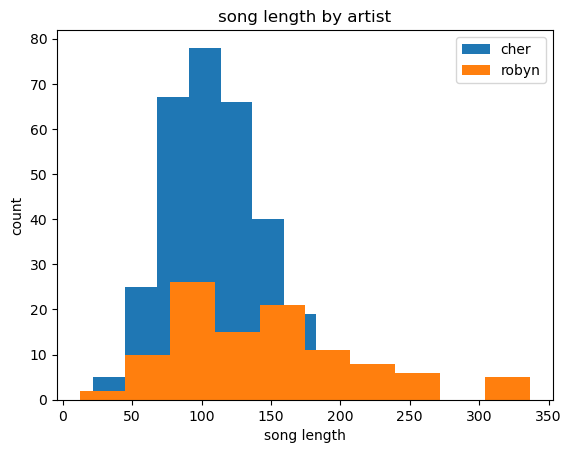

In [229]:
# plot the histogram 
hist_data.groupby('Artist')['num_tokens'].plot(kind="hist", legend=True)

plt.xlabel("song length")
plt.ylabel("count")
plt.title("song length by artist")
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: matches on one or more whitespace, this helps detect multiple whitespaces in a string.